<a href="https://colab.research.google.com/github/MoohShadox/MCNN_Training/blob/main/S%C3%A9ance_0_Pr%C3%A9requis_en_Alg%C3%A8bre_et_en_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La descente de gradient : un outil indispensable d'optimisation numérique

## Introduction 
Souvent en Machine Learning les modèles de décision dépendent de paramètres qui peuvent être """optimisés""" et donc pour trouver les meilleurs paramètres il faut souvent minimiser une fonction d'erreur.

Cette fonction est généralement **différentiable** (elle admet une dérivée) et donc la descente de gradient est largement utilisés pour "fit" un réseau de neurones (le faire coller aux données).

## Principe de base
Imaginez qu'on ait une fonction simple de $\mathcal{R}$ dans $\mathcal{R}$ : 
$$f(x) = (x-5)^2 + 3$$
Il est clair que le problème $z^* = min_{x \in \mathcal{R}}(f(x))$ admet comme solution optimale $x^*=5$ avec comme valeur $z^* =3$

Imaginons qu'on veuille résoudre numériquement le problème suivant 
La fonction a optimiser est différentiable (Polynôme) et sa dérivée est : 
$$f'(x) = 2(x-5)$$
D'abord essayons d'afficher ces deux fonctions pour trouver un moyen graphique de conçevoir un algorithme permettant de résoudre ce problème.

Fin avec x_0 =  5.000000000042043


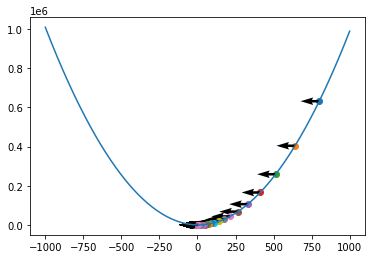

In [2]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x : (x-5)**2 + 3
f_p = lambda x : 2*(x-5)


x_0 = +800 #Par exemple

X = np.linspace(-1000,1000,1000)
Y = f(X)
plt.plot(X,Y)



while (np.abs(f_p(x_0)) > 1e-10):
  plt.scatter(x_0,f(x_0))
  plt.quiver(x_0,f(x_0),-f_p(x_0),0)
  x_0 = x_0 - 0.1*f_p(x_0)


print("Fin avec x_0 = ",x_0)

## Auto-diff : Calcul automatique du gradient d'une fonction
Torch et Tensorflow proposent un mécanisme d'auto-differentiation qui permet de calculer le gradient d'une fonction représentée par un DAG (Direct Acyclique Graph) de manière automatique en utilisant la règle de composition (The Chain Rule).

D'abord commençons par montrer comment on peut construire un DAG.

In [3]:
import torch
t = torch.tensor(10, dtype=torch.float , requires_grad=True)
t.shape

torch.Size([])

In [4]:
import torch

x_0 = -700.0


# Pour commencer définissons des tenseurs dans lesquels nous allons introduire nos données.
x = torch.tensor(x_0)

#Ensuite la fonction f définie précédemment doit être donnée par la feuille de l'arbre donc : 
y_1 = x - 5
y_2 = torch.pow(y_1,2)
f_t = y_2 + 3
print("Contenu du tensor : " , f_t)
print("Retour de la fonction pour le même x_0 ",f(x_0))


Contenu du tensor :  tensor(497028.)
Retour de la fonction pour le même x_0  497028.0


Ensuite on va utiliser la librairie d'auto-differentiation pour calculer la dérivée de f_t en x_0 automatiquement.
Pour ce faire un repéte le même processus en ajoutant un paramètre qui va spécifier a torch qu'il faut prévoire le calcul du gradient.

In [5]:
x = torch.tensor(x_0,requires_grad=True)
y_1 = x - 1
y_2 = torch.pow(y_1,2)
f_t = y_2 + 3
print("Contenu du tensor : " , f_t)

Contenu du tensor :  tensor(491404., grad_fn=<AddBackward0>)


In [6]:
!pip install torchviz

     |████████████████████████████████| 51kB 4.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=f5e1e751f31e6e29a4d7e1832b6aaf6849d518308ccb33c6cd98c750bec45608
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


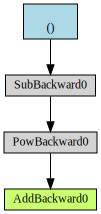

In [7]:
from torchviz import make_dot
make_dot(f_t)

In [12]:
from torch.autograd import Variable

x = torch.tensor(8).float()
x_v = Variable(x,requires_grad=True)
y_1 = x_v - 5
y_2 = torch.pow(y_1,2)
f_t = y_2 + 3
print("x_v = ",x_v)
print("y_1 = ",y_1)
print("y_2 = ",y_2)
print("f_t = ",f_t)

x_v =  tensor(8., requires_grad=True)
y_1 =  tensor(3., grad_fn=<SubBackward0>)
y_2 =  tensor(9., grad_fn=<PowBackward0>)
f_t =  tensor(12., grad_fn=<AddBackward0>)


In [9]:
f_t.backward()

print("x_v = ",x_v.grad)
print("y_1 = ",y_1.grad)
print("y_2 = ",y_2.grad)
print("f_t = ",f_t.grad)

x_v =  tensor(-6.)
y_1 =  None
y_2 =  None
f_t =  None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """
/u

Ici on va essayer de dérouler manuellement les différentes étapes de calcul du gradient de la loss en utilisant la chain rule.

Pour rappel la chain rule fonctionne comme suit : 
- Je veux calculer la dérviée d'une fonction w.r.t x disons que je veuille calculer $\frac{\partial f}{\partial x}$ et f s'écrit comme $f(x) = g(y) $ avec y=h(x) c'est a dire avec une fonction qui ne s'écrit pas en x mais en une autre variable y qu'on obtient par une fonction sur x.

On peut calculer le gradient progressivement grâce a la relation : 
$\frac{\partial f}{\partial x} = \frac{\partial f}{\partial y} * \frac{\partial y}{\partial x}$

In [11]:
x = torch.tensor(8.)
x_v = Variable(x,requires_grad=True)

y_1 = x_v - 5
y_2 = torch.pow(y_1,2)
f_t = y_2 + 3

y_1.retain_grad()
y_2.retain_grad()
f_t.retain_grad()

f_t.backward()
print("x_v = ",x_v.grad) # x_v = 8 #6 
print("y_1 = ",y_1.grad) # y_1 = x_v - 5 = 3 --> dy_1/dx_v = 1 en remplaçant 8 ça donne 1 et en multipliant par 6 ça remonte 6
print("y_2 = ",y_2.grad) # y_2 = y_1**2 = 9 --> dy_2/d_y1 = 2y_1 en remplaçant en 3 on trouve 6 et on multuplie par 1 donc ça remonte 6
print("f_t = ",f_t.grad) # f_t = y_2 + 3 = 12 --> df_t/dy_2 = 1 en remplaçant en 9 on trouve 1

x_v =  tensor(6.)
y_1 =  tensor(6.)
y_2 =  tensor(1.)
f_t =  tensor(1.)


In [14]:
print("Vraie dérivée = ",f_p(8))

Vraie dérivée =  6


A présent montrons comment on peut utiliser le gradient de la même manière 
que précédemment afin d'effectuer une descente de gradient.

In [ ]:
x = torch.tensor(x_0)
x_v = Variable(x,requires_grad=True)

for i in range(0,1000):
  y_1 = x_v - 5
  y_2 = torch.pow(y_1,2)
  f_t = y_2 + 3
  f_t.backward()
  #x_v  = x_v - 0.01 * x_v.grad
  #x_v  -= 0.01 * x_v.grad
  
  with torch.no_grad():
    x_v  -= 0.01 * x_v.grad
  
  x_v.grad.zero_()

print("x = ",x)

x =  tensor(5.0000)


Pas trés pratique de devoir fixer un nombre d'itérations avant convergence..

Nous préférerons par conséquence partir sur une formulation tel que celle ci qui fixe comme condition de sortie que le gradient soit suffisament proche de 0 (ce qui indique qu'on est proche de l'optimum)

In [ ]:
x = torch.tensor(x_0)
x_v = Variable(x,requires_grad=True)

it = 0
while (True):
  it += 1
  y_1 = x_v - 5
  y_2 = torch.pow(y_1,2)
  f_t = y_2 + 3
  f_t.backward()
  with torch.no_grad():
    x_v  -= 0.01 * x_v.grad #A l'occasion 0.1 : Learning Rate 
    if (np.abs(x_v.grad) < 1e-4):
      break
  x_v.grad.zero_()

print("x_v = ",x_v)
print(f"En {it} itérations ! ")

x_v =  tensor(5.0000, requires_grad=True)
En 817 itérations ! 


## Quelques conseils de conception : 
Dans cette partie je vais essayer de détailler des conventions qui sont fréquemment utilisés quand on veut conçevoir des DAG en vu de se servir du module d'auto-differentiation.
Nous allons utiliser chaque convention séquentiellement sur l'exemple précédent pour montrer comment nous pouvons améliorer la lisiblité du code et sa modularité.

### Séparer dans deux fonctions le calcul de la fonction a optimiser et le processus d'optimisation

Pour faciliter la manipulation des DAG il est pratique de les considérer comme des objets qui sont construits par l'intermédiaire d'une fonction.

Le processus d'optimisation également peut être modélisé par une fonction ce qui a pour aventage de permettre de le paramètrer plus facilement.

In [ ]:
"""
Cette fonction construit un DAG et va "brancher" le x que je lui donne en paramètre
"""
def get_f(x):
  y_1 = x - 5
  y_2 = torch.pow(y_1,2)
  f_t = y_2 + 3
  return f_t

"""
Et celle la déclenche l'optimisation a partir du x_0 que je lui donne en paramètre et renvoie la valeur optimale de x.
Je peux donner la précision et le teau d'apprentissage en paramètres en leur donnant une valeur par défaut.
Je peux également récupérer le nombre d'itérations avant convergence.
"""
def optimize(x_0, precision = 1e-4, alpha = 0.01):
  x_0 = float(x_0) #essayez de commenter cette ligne.
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = get_f(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
  return x_v, it


x_v, it = optimize(10)
print("x_v = ",x_v)
print(f"En seulement {it} itérations ! ")

x_v =  tensor(5.0000, requires_grad=True)
En seulement 572 itérations ! 


### Servez vous du fait que les fonctions soient des objets
En python les fonctions sont également des objets qui peuvent être passés en paramètres.

Petit exemple :

In [ ]:
def composition(f, g, x):
  print("Composé : ",f(g(x)))
  return f(g(x))


def f(x):
  return x + 1


def g(x):
  return x**2

composition(f,f,2)

Composé :  4


4

In [ ]:
def f1(x):
  y_1 = x - 1
  y_2 = torch.pow(y_1,2)
  f_t = y_2 + 3
  return f_t

def f2(x):
  y_1 = x - 5
  y_2 = torch.pow(y_1,4)
  f_t = y_2 + 3
  return f_t

#J'ai ajouté le maximum d'itérations je vous laisse deviner pourquoi (non je l'explique dans la partie sur comment débugger ) 
def optimize(x_0, func, precision = 1e-4, alpha = 0.01, max_it = 1000):
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
    if(it == max_it):
      break
  return x_v, it

#A présent on peut donner en paramètre la fonction a optimiser.

x_v, it = optimize(20.0,f1)
print("optimum de f1 = ",x_v)
print(f"En {it} itérations ! ")

x_v, it = optimize(20.0,f2)
print("optimum de f2 = ",x_v)
print(f"En {it} itérations ! ")

optimum de f1 =  tensor(1.0000, requires_grad=True)
En 637 itérations ! 
optimum de f2 =  tensor(nan, requires_grad=True)
En 1000 itérations ! 


### Personne ne le sait mais on peut typer en Python
A vrai dire le typage peut éviter a vos camarades de mal utiliser vos fonctions en plus de faciliter la relecture du code donc n'hésitez pas a vous en servir.



In [ ]:
#Trés utile pour préciser qu'on attend un certain genre de fonctions en paramètres
#Donc pour preciser par exemple qu'un argument est une fonction qui prend en paramètres deux entiers et retourne un float on écrira : 
# func : Callable[[int, int], float]
from typing import Callable

def get_f(x : torch.tensor ) -> torch.tensor:
  y_1 = x - 1
  y_2 = torch.pow(y_1,2)
  f_t = y_2 + 3
  return f_t

#Pas la peine de le mettre sur tout les paramètres juste sur ceux qui sont délicats
def optimize(x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
    if(it == max_it):
      break
  return x_v, it



### La documentation c'est vital
C'est bien beau d'avoir paramètré et typé nos paramètres mais maintenant il faut qu'on puisse comprendre ce qui se passe quand on les change sans avoir a éplucher le code.

De plus, quand on fait du dévelopemment on passe infiniment plus de temps a lire du code qu'a en écrire et particulièrement si on travaille en équipe.
Ainsi faciliter la relecture de son code rapporte plus de temps a une équipe que d'écrire du code rapidement.

In [ ]:
#Dans cette partie je vais écrire ce qui s'appelle une "docstring" les docstring suivent en général toujours le même format qui est en l'occurrence le suivant : 
"""
[Un petit résumé de ce que fait la fonction dans les grandes lignes (pas la peine de mettre "cette fonction additionne si la fonction s'appelle add)]
Params (même conseil les paramètres évidents il n'y a pas besoin de les expliquer): 
  - param1 : son explication
  - param2 : son explication 
  -... etc
Returns : 
  - premier retour : son explication
  - deuxième retour : son explication 
  - etc...
[Eventuellement des notes et des remarques]
N'oubliez pas qu'une fonction qui effectue des modifications "in place" au lieu de retourner une copie modifiée est indiquée par le fait qu'elle se termine par un "_" (en général)
"""


def optimize(x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
  """
  Compute a gradient descent.
  Params: 
    - x_0: Initial point
    - func: Function to optimize (DAG).
    - alpha: Learning rate
    - max_it: Maximum of iterations
  Returns:
    - x_v: Optimum
    - it: Number of iterations before convergence.
  """
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
    if(it == max_it):
      break
  return x_v, it

In [ ]:
help(optimize)

Help on function optimize in module __main__:

optimize(x_0:<built-in method tensor of type object at 0x7f7cc4073560>, func:Callable[[<built-in method tensor of type object at 0x7f7cc4073560>], <built-in method tensor of type object at 0x7f7cc4073560>], precision=0.0001, alpha=0.01, max_it=1000) -> (<built-in method tensor of type object at 0x7f7cc4073560>, <class 'int'>)
    Compute a gradient descent.
    Params: 
      - x_0: Initial point
      - func: Function to optimize (DAG).
      - alpha: Learning rate
      - max_it: Maximum of iterations
    Returns:
      - x_v: Optimum
      - it: Number of iterations before convergence.



### Pour ceux qui développent un **nouvel** outil : prévoir des utilitaires facilitant le suivi de l'évolution des paramètres
Quand on développe une nouvel approche ce qui n'est généralement pas le cas (sauf si vous avez un PFE) il faut souvent fournir des courbes montrant l'efficacité de notre approche et donc prévoire certaines fonctions utiles pour ça tel que l'enregistrement de l'évolution du certains paramètres liés a au déroulement de l'algorithme.

Ici typiquement il serais intéressant de voire l'allure de la courbe correspondant a l'évolution du gradient et de l'objectif au fil des itérations afin de l'inclure dans un rapport.

In [ ]:
def optimize(x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
  """
  Compute a gradient descent.
  Params: 
    - x_0: Initial point
    - func: Function to optimize.
    - alpha: Learning rate
    - max_it: Maximum of iterations
  Returns:
    - x_v: Optimum
    - it: Number of iterations before convergence.
  """
  #Par convention on appelle ça des "logs"
  
  logs = {
      "grad":[],
      "obj":[]
  }

  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      logs["grad"].append(float(x_v.grad.detach().numpy()))
      logs["obj"].append(float(f_t.detach().numpy()))
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
    if(it == max_it):
      break
  return x_v, it, logs



x_v, it, logs = optimize(20.0,f1)
print("optimum de f2 = ",x_v)
print(f"En {it} itérations ! ")

optimum de f2 =  tensor(1.0000, requires_grad=True)
En 637 itérations ! 


Ces logs sont trés pratiques car ils permettent de dessiner des figures 

Text(0.5, 1.0, "Evolution du gradient en fonction du nombre d'itérations")

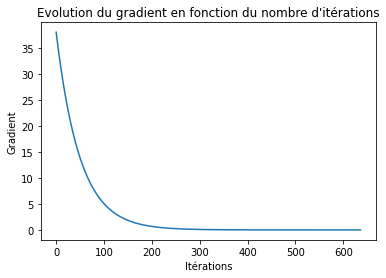

In [ ]:
plt.plot(np.arange(it), logs["grad"])
plt.xlabel("Itérations")
plt.ylabel("Gradient")
plt.title("Evolution du gradient en fonction du nombre d'itérations")

Text(0.5, 1.0, "Evolution de l'objectif en fonction du nombre d'itérations")

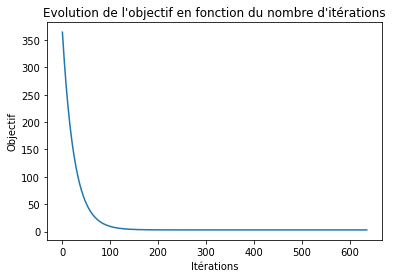

In [ ]:
plt.plot(np.arange(it), logs["obj"])
plt.xlabel("Itérations")
plt.ylabel("Objectif")
plt.title("Evolution de l'objectif en fonction du nombre d'itérations")

### Pensez a regrouper les fonctionnalités en utilisant la programmation orientée objet 

Souvent Python est apprécié pour son paradigm fonctionnel mais le paradigm orienté objet peut dans plusieurs cas s'avérer utile.

Dans l'exemple précédent je ne retourne les historiques que pour pouvoir afficher des figures et rien d'autre, une autre façon de voire le fonctionnement du code serrait d'inclure la fonction d'affichage au coté de la fonction d'optimisation au sein d'un objet et d'utiliser un attribut interne du dit objet pour stocker les différents historiques.

In [ ]:
class Optimizer():

  #C'est comme ça qu'on défini un constructeur.
  def __init__(self):
    self.logs = {
      "grad":[],
      "obj":[]
    }
    self.it = 0
    self.obj = None
  
  def optimize(self,x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
    """
    Compute a gradient descent.
    Params: 
      - x_0: Initial point
      - func: Function to optimize.
      - alpha: Learning rate
      - max_it: Maximum of iterations
    Returns:
      - x_v: Optimum
    """
    #Par convention on appelle ça des "logs"
    self.obj = func
    x_0 = float(x_0)
    x = torch.tensor(x_0)
    x_v = Variable(x,requires_grad=True)
    self.it = 0
    while (True):
      self.it += 1
      f_t = func(x_v)
      f_t.backward()
      with torch.no_grad():
        x_v  -= alpha * x_v.grad
        self.logs["grad"].append(float(x_v.grad.detach().numpy()))
        self.logs["obj"].append(float(f_t.detach().numpy()))
        if (np.abs(x_v.grad) < precision):
          break
      x_v.grad.zero_()
      if(self.it == max_it):
        break
    return x_v
  
  def plot_gradient_evol(self):
    plt.plot(np.arange(it), logs["grad"])
    plt.xlabel("Itérations")
    plt.ylabel("Gradient")
    plt.title("Evolution du gradient en fonction du nombre d'itérations")
    return plt
  
  def plot_objectif_evol(self):
    plt.plot(np.arange(it), logs["obj"])
    plt.xlabel("Itérations")
    plt.ylabel("Objectif")
    plt.title("Evolution de l'objectif en fonction du nombre d'itérations")
    return plt
  
  def plot_obj_func(self):
    X = torch.tensor(np.linspace(-40,40, 1000))
    y = self.obj(X).detach().numpy()
    plt.plot(X,y)
    return plt


In [ ]:
op = Optimizer()
x_v = op.optimize(10,f1)
print("x_v = ",x_v)
print(f"En seulement {op.it} itérations ! ")

x_v =  tensor(1.0000, requires_grad=True)
En seulement 600 itérations ! 


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

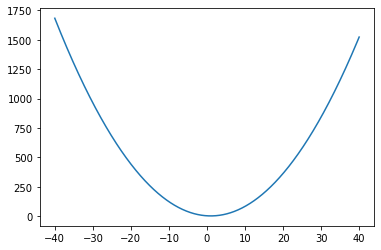

In [ ]:
op.plot_obj_func()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

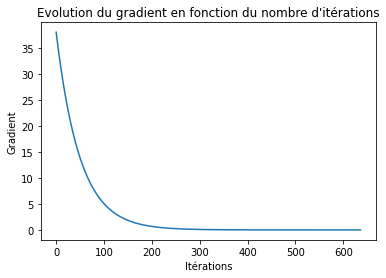

In [ ]:
op.plot_gradient_evol()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

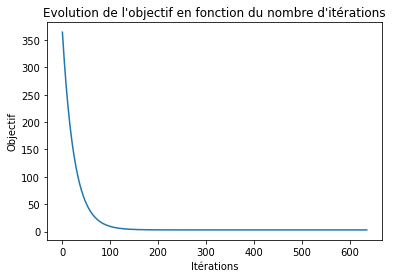

In [ ]:
op.plot_objectif_evol()

### N'en faites pas trop !
Le concept le plus important a retenir s'appelle KISS : Keep It Simple Stupid.

Il ne faut compléxifier le code qu'en cas d'extème nécéssité, par exemple la pertinence de l'utilisation d'une classe dans les cellules précédentes en cas réel est très discutable, de même que de passer une fonction en paramètres.

Le plus clair du temps la fonction a optimiser sera unique, et les courbes que vous chercherez a afficher vous les afficherez une seule fois et vous les enregistrerez pour votre rapport mais le fait de pouvoir afficher ce genre de courbes ne doit pas **nécéssairement** faire partie des fonctionnalités accessibles a la personne qui utilise votre code.

Donc selon moi, le plus clair du temps vos collegues, supérieurs et enseignants s'attendrons a un produit final qui ressemble a ça : 

In [ ]:
def optimize(x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
  """
  Compute a gradient descent.
  Params: 
    - x_0: Initial point
    - func: Function to optimize.
    - alpha: Learning rate
    - max_it: Maximum of iterations
  Returns:
    - x_v: Optimum
  """
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
    if(it == max_it):
      break
  return x_v

## Quelques conseils de développement
Dans cette partie je vais aborder certaines spécificités a connaitre quand on développe une solution sous pyTorch.

### Utiliser les optimizers de pytorch

Comme vous pouvez vous en douter nous ne sommes pas les premiers a penser a développer une classe qui permet d'optimiser une fonction. 

Pytorch propose pour cela le module Optimizer qui contient plusieurs algorithmes de descente de gradient plus ou moins sophistiqués.

In [ ]:
def optimize(x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
  """
  Compute a gradient descent.
  Params: 
    - x_0: Initial point
    - func: Function to optimize.
    - alpha: Learning rate
    - max_it: Maximum of iterations
  Returns:
    - x_v: Optimum
    - it: Number of iterations before convergence.
  """
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)

  #SGD : Stochastic Gradient Descent 
  optimizer = torch.optim.SGD( [x_v] , lr=alpha)

  it = 0
  for i in range(max_it):
    it += 1
    f_t = func(x_v)
    ## Attention ces trois lignes vous les verrez jusqu'a l'indigestion donc comprenez les bien ! 
    ## === Etape 01 : Refaire monter le gradient jusqu'au variables qui sont dans l'optimizer 
    f_t.backward()
    ## == Etape 02 : On effectue une étape d'optimisation, cette étape peut être aussi simple que celle qu'on faisait ou être plus sophistiquée (en utilisant un moment par exemple)
    optimizer.step()
    ## == Etape 03 : On efface les gradients pour qu'ils ne s'accumulent pas
    optimizer.zero_grad()
    ## ====

  return x_v


optimize(10.0, f1)

tensor(1.0000, requires_grad=True)

In [ ]:
def optimize(x_0 : torch.tensor , func:Callable[[torch.tensor], torch.tensor] , precision = 1e-4, alpha = 0.01, max_it = 1000) -> (torch.tensor, int):
  """
  Compute a gradient descent.
  Params: 
    - x_0: Initial point
    - func: Function to optimize.
    - alpha: Learning rate
    - max_it: Maximum of iterations
  Returns:
    - x_v: Optimum
    - it: Number of iterations before convergence.
  """
  
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)

  #Adam Optimizer
  optimizer = torch.optim.Adam([x_v], lr=1e-1)

  it = 0
  for i in range(max_it):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    optimizer.step()
    optimizer.zero_grad()
  return x_v

optimize(10.0, f1, max_it=4000)

tensor(1.0000, requires_grad=True)

### Exécuter sur un GPU voire un TPU 

Il arrive qu'on soit fréiné dans nos recherches par le nombre de simulations qu'on peut exécuter a cause du fait notamment qu'elles peuvent prendre beaucoup de temps, l'une des solutions qu'il est possible d'envisager est d'éxécuter les opérations tensorielles sur un GPU ou sur un TPU pour qu'elles soient plus rapides.

Etant donné que vous disposez quasi-tous d'un GPU sur votre ordinateur nous allons d'abord montrer comment une exécuter sur GPU est possible.

In [ ]:
import torch
import numpy as np

#D'abord on assigne a cette variable la chaine "cuda" si ce périphérique est accessible
device_gpu = 'cuda' if torch.cuda.is_available() else 'cpu'
#Maintenant définissons une deuxième chaine pour qu'on puisse comparer les performances
device_cpu = "cpu"

#On crée des matrices
mat1 = torch.rand(10)
mat2 = torch.rand(10)
mat2

tensor([0.5378, 0.0949, 0.6142, 0.7431, 0.3135, 0.9394, 0.8817, 0.2835, 0.9552,
        0.2789])

In [ ]:
#C'est comme ça qu'on transfère une matrice sur un périphérique
mat1 = mat1.to(device_gpu)
mat1
mat2 = mat2.to(device_cpu)
mat2

tensor([0.5378, 0.0949, 0.6142, 0.7431, 0.3135, 0.9394, 0.8817, 0.2835, 0.9552,
        0.2789])

In [ ]:
#Essayons de faire des opérations par exemple une multiplication
#mat1@mat2 #comme tout le monde peut le deviner ça va pas marcher parce qu'ils ne sont pas sur le même périphérique

#Donc on les déplace
mat2 = mat2.to(device_gpu)
m = mat1@mat2
m

tensor(3.7120)

In [ ]:
#Et si on essayais de le transformer en un tenseur numpy (je dis ça au hasard)

#arr = np.array(m) Oh mais quel surprise ! ça marche pas ! 

arr = np.array(m.cpu()) #m.cpu() permet de copier le contenu du tenseur m sur le CPU
arr

array(3.712019, dtype=float32)

A présent afin d'expérimenter les différence de performances au niveau du temps d'exécution on va définir une fonction qui va effectuer un certain nombre d'opérations et qui aura comme paramètre un device sur lesquels les executer.


In [ ]:
def simulation(device):
  mat1 = torch.rand((1000,1000)).to(device)
  ei = torch.eig(mat1)

In [ ]:
%timeit simulation("cpu")

1 loop, best of 3: 485 ms per loop


In [ ]:
%timeit simulation("cuda")

RuntimeError: ignored

Alors la ça se voit pas énormement mais en réalité quand on entrain des gros modèles ça fait une grande différence (pour plus d'informations regardez [ici](https://github.com/ilkarman/DeepLearningFrameworks)

Maintenant examinons comment on peut exécuter des calculs sur un TPU.

Déja une principale différence c'est que a part si vous êtes quelqu'un de chez Google a priori vous n'avez pas accès physiquement a un TPU donc il faut utiliser un TPU accessible en SaaS sur une plateforme Cloud (comme Collab).

In [ ]:
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp36-cp36m-linux_x86_64.whl

In [ ]:
import torch_xla.core.xla_model as xm

device = xm.xla_device()

In [ ]:
%timeit simulation(device)

1 loop, best of 3: 552 ms per loop


## Quelques conseils sur comment investiger une erreur 

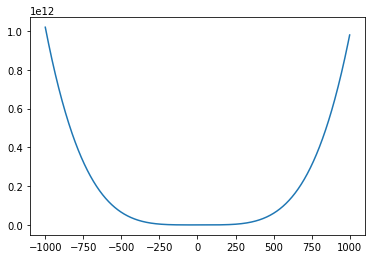

In [ ]:
"""
A quoi sert le maximum d'itérations ?
En général quand on code on n'est pas a l'abri des erreurs qui transforment la fonction objectif en une fonction non bornée ce qui fait que la boucle ne se termine jamais
D'ou l'intéret de limiter son exécution !
Ainsi quand on tombe sur un cas comme le précedent ou l'algorithme se termine sur une valeur infini on peut investiger la raison de cela.
"""

X = torch.tensor(np.linspace(-1000,1000, 1000)) #je transforme en tenseur pour pouvoir utiliser la fonction précédente
y = f2(X).detach().numpy() #Au passage c'est comme ça qu'on retransforme un tenseur pytorch en tenseur numpy, on verra plus tard le sens du detach

plt.plot(X,y)

In [ ]:
#Ajouter de la verbosité ! 
def optimize(x_0, func, precision = 1e-4, alpha = 0.01, max_it = 1000, verbose = False):
  x_0 = float(x_0)
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():
      x_v  -= alpha * x_v.grad
      if (verbose):
        print("val: ", x_v)
        print("grad: ",x_v.grad)
      if (np.abs(x_v.grad) < precision):
        break
    x_v.grad.zero_()
    
    if(it == max_it):
      break
  return x_v, it

x_v, it = optimize(20.0,f2,verbose = True,max_it = 10)
x_v

val:  tensor(-115., requires_grad=True)
grad:  tensor(13500.)
val:  tensor(69005., requires_grad=True)
grad:  tensor(-6912000.)
val:  tensor(-1.3140e+13, requires_grad=True)
grad:  tensor(1.3140e+15)
val:  tensor(inf, requires_grad=True)
grad:  tensor(-inf)
val:  tensor(nan, requires_grad=True)
grad:  tensor(inf)
val:  tensor(nan, requires_grad=True)
grad:  tensor(nan)
val:  tensor(nan, requires_grad=True)
grad:  tensor(nan)
val:  tensor(nan, requires_grad=True)
grad:  tensor(nan)
val:  tensor(nan, requires_grad=True)
grad:  tensor(nan)
val:  tensor(nan, requires_grad=True)
grad:  tensor(nan)


tensor(nan, requires_grad=True)

val:  tensor(20., requires_grad=True)
grad:  tensor(13500.)
val:  tensor(-115., requires_grad=True)
grad:  tensor(-6912000.)


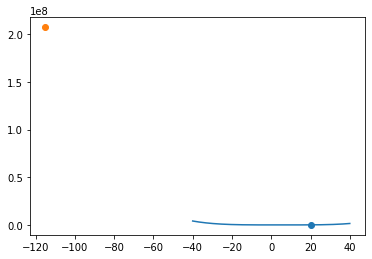

In [ ]:
#Voire ajouter du visuel !
def optimize(x_0, func, precision = 1e-4, alpha = 0.01, max_it = 1000, verbose = False, visualize=False):
  x_0 = float(x_0) 
  x = torch.tensor(x_0)
  x_v = Variable(x,requires_grad=True)
  it = 0
  while (True):
    it += 1
    f_t = func(x_v)
    f_t.backward()
    with torch.no_grad():

      if (verbose):
        print("val: ", x_v)
        print("grad: ",x_v.grad)


      if (visualize):
        plt.scatter(x_v.detach().numpy(), f_t.detach().numpy())

      if (np.abs(x_v.grad) < precision):
        break
      x_v  -= alpha * x_v.grad

      
    x_v.grad.zero_()
    
    if(it == max_it):
      break
  return x_v, it

X = torch.tensor(np.linspace(-40,40, 1000))
y = f2(X).detach().numpy()
plt.plot(X,y)


x_v, it = optimize(20.0,f2,verbose = True,max_it = 2,visualize=True)
plt.show()

Ce phénomène est trés courant et s'appelle : **Divergence du gradient**
Ce qui c'est passé c'est que j'étais a gauche de l'optimum et en métant a jour avec le gradient je me suis trop décalé a droite du coup le gradient était encore plus grand, et donc je suis allé encore plus a gauche ce qui a encore augmenté le gradient etc...

La solution connue est : Diminuer le teau d'apprentissage.

In [ ]:
x_v, it = optimize(20.0,f2,alpha=0.001,max_it = 100000)
plt.show()
print("optimum de f2 = ",x_v)
print(f"En {it} itérations ! ")

optimum de f2 =  tensor(5.0391, requires_grad=True)
En 100000 itérations ! 


# Gradient Descent : cas à plusieurs variables 

### Concept de base

Le mot dérivée partielles est un mot qui effraie beaucoup de gens alors qu'en réalité c'est juste l'extension du concept de dérivée a une fonction qui dépend de plusieurs paramètres.

Reprenons la fonction précédente mais imaginons cette fois qu'elle prend deux paramètres.

$$f(x, y) = (x-5)^2 + (y-3)^2 + 5$$

Première difficulté a envisager, comment représenter cette fonction ?

Une façon simple est d'utiliser une "heatmap" c'est a dire une grille avec en abscisse les valeurs de x, en ordonnée celles de y et dont les couleurs des cases représenterons la valeur de la fonction f.

In [ ]:
#J'en profite pour montrer cette notation qui permet de définir facilement une fonction sur une seule ligne

f_2 = lambda x,y : (x-5)**2 + (y-3)**2 + 5

#On initialise la grille
grid = np.zeros((1000,1000))

for x in range(grid.shape[0]):
  for y in range(grid.shape[1]):
    grid[x][y] = f_2(x, y)

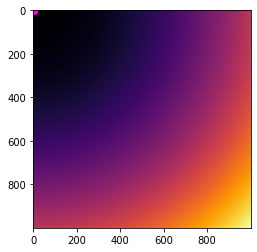

In [ ]:
#Plus c'est rouge plus c'est une grande valeur et plus c'est rouge plus c'est une petite valeur
plt.imshow(grid, cmap="inferno")
plt.scatter(5,3,c = "magenta")

Maintenant pour effectuer une descente de gradient il faut calculer les dérivées "partielles" c'est a dire les dérivées w.r.t (with respect to) chaque paramètre (en considérant tout les autres commet des constantes) et donc :
$$\frac{\partial f}{\partial x} = 2(x-5)$$
Idem pour y
$$\frac{\partial f}{\partial y} = 2(y-3)$$

Et donc le **gradient** de f est la fonction qui a chaque (x,y) associe le vecteur $$(2(x-5), 2(y-3))$$ qui correspond a la direction vers lequel f augmente localement (tel3a).

In [ ]:
def f_2_p(x,y):
  return (2*(x-5), 2*(y-3))

#Et donc la descente de gradient fonctionne normalement 
x_0, y_0 = (500,800)
f_2_p(x_0,y_0)

(990, 1594)

Donc a présent nous pouvons effectuer une descente de gradient comme précédemment :

Finalement x= 5.00000016194436, y = 3.000000162351767


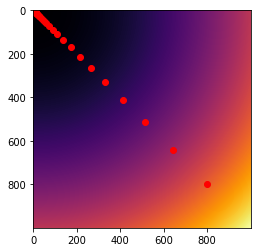

In [ ]:
x_0, y_0 = (800,800)
x,y = x_0,y_0
plt.imshow(grid, cmap="inferno")
plt.scatter(5,3,c = "blue")

alpha = 0.1

for i in range(100):
  grad = f_2_p(x,y)
  plt.scatter(x,y,c="red")
  x = x - alpha*grad[0]
  y = y - alpha*grad[1]
print(f"Finalement x= {x}, y = {y}")

## Utilisation de Pytorch
Bien évidemment on peut utiliser pytorch pour calculer automatiquement le gradient.

In [ ]:
def f(x,y):
    y_1 = x - 5
    y_2 = y - 3
    f_t = torch.pow(y_1, 2) + torch.pow(y_2, 2) + 5
    return f_t

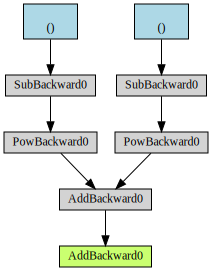

In [ ]:
x_0, y_0 = (800.0,800.0)
x = Variable(torch.tensor(x_0),requires_grad=True)
y = Variable(torch.tensor(y_0),requires_grad=True)
f_t = f(x,y)
make_dot(f_t)

In [ ]:
x_0, y_0 = (800.0,800.0)
x = Variable(torch.tensor(x_0),requires_grad=True)
y = Variable(torch.tensor(y_0),requires_grad=True)

#On précise les deux variables
optimizer = torch.optim.SGD([x,y], lr=1e-1)

for i in range(100):
  f_t = f(x,y)
  f_t.backward()
  optimizer.step()
  optimizer.zero_grad()

print(x,y)

tensor(5.0000, requires_grad=True) tensor(3.0000, requires_grad=True)


## Un dernier petit point conception : 
En réalité souvent la différence entre un tensor et une Variable est qu'une variable est généralement prévue pour contenir des paramètres a optimiser (ici typiquement x et y) alors que les variables tensors contiennent les données utilisées pour évaluer la fonction a optimiser (ici il n'y en a pas car f se calcule uniquement a partir de x et de y mais plus tard ça sera le dataset de test) 

Et les paramètres sont mises dans un vecteur (généralement appelé $\theta$ ) donc en l'occurrence plûtot que d'avoir deux paramètres il serait plus correct de créer un vecteur de deux éléments.


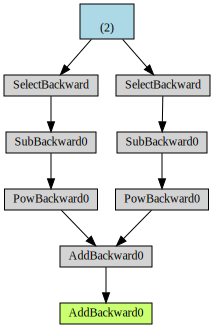

In [ ]:
def f(theta):
    y_1 = theta[0] - 5
    y_2 = theta[1] - 3
    f_t = torch.pow(y_1, 2) + torch.pow(y_2, 2) + 5
    return f_t
  
theta_0 = torch.tensor([300. , 800.])
theta = Variable(theta_0,requires_grad=True)
f_t = f(theta)
make_dot(f_t)

In [ ]:
#On précise theta au lieu de x et y
optimizer = torch.optim.SGD([theta], lr=1e-1)

for i in range(100):
  f_t = f(theta)
  f_t.backward()
  optimizer.step()
  optimizer.zero_grad()

print(theta)

tensor([5.0000, 3.0000], requires_grad=True)


# Recette : Comment définir un modèle

Dans cette partie on va détailler les étapes a suivre dans la conception d'un modèle, ces étapes vont garentir que l'implémentation sous pytorch sera simple et efficace, on va les appliquer par la suite a deux cas concrêts : 

- **L'optimisation d'un modèle d'apprenitssage statistique par maximum de vraisemblance (Max Likelihood)**
- **L'optimisation d'un modèle par minimisation d'un coût**

Donc pour revenir a nos étapes, définir un modèle nécessite de passer par les étapes suivantes : 

1. Définir les données, les paramètres
2. Préciser le calcul de la fonction a optimiser (faut qu'elle soit différentiable sinon la descente de gradient ne va pas fonctionner et il faudra se tourner vers un algorithme évolutionnaire cf mon dernier workshop)
3. Ecrire l'algorithme d'optimisation en précisant ces hyper-paramètres.

C'est flou ? c'est normal c'est a ça que vont servir les examples.

## Maximum de vraisemblance pour le modèle le plus simple de l'univers



### Problématique
Imaginons qu'on ait une pièce et qu'on veuille prédire les tirages qu'elle est suceptible de faire typiquement on veut répondre a la question : "combien de chances j'ai d'avoir pile et pile ?"

Cette expérience (de jeter une pièce) admet deux résultats possibles : pile et face, donc on peut la modéliser en utilisant une distribution de bernouilli.

### Quelques notions en apprentissage statistique
---

**Rappel** : 

Une distribution de bernouilli c'est une distribution paramètrée par un seul paramètre $\theta = [ p ]$ ce paramètre correspond a la probabilité d'obtenir le résultat 1.

$$P(x=1, \theta = [p] ) = p$$
$$P(x=0, \theta = [p] ) = 1-p$$

---

On peut calculer la probabilité de notre ensemble de données en multipliant les probabilité de chaque tirage qui s'appelle **vraisemblance** de l'ensemble de donnée.

$$\mathcal{L}(\theta) =  P(x=X, \theta = [p] ) = \prod_{x_i \in X} P(x=x_i, \theta = [p] )$$

Et comme les produits on est pas méga fan parce que ça s'annule rapidement on aime bien passer au logarithme.

$$log(\mathcal{L}(\theta)) = \sum_{x_i \in X} log(P(x=x_i, \theta = [p] ))$$

### Et en pratique ça sert a quoi ?

J'ai envie de conçevoir un modèle qui calcule la probabilité d'apparition d'un phénomène donné (ici un tirage de pièce), je choisi un modèle que je pense capable de modéliser le phénomène (ici un modèle de bernoulli) mais ce modèle va dépende de paramètre (ici la probabilité de faire pile) donc comment optimiser ce modèle ?

**Solution** Avoir une base de ces phénomène me permet de calculer pour un $\theta$ donné la probabilité que le modéle ait généré cette base de donnée, cette probabilité s'appelle **vraisemblance** et si j'utilise la log-vraisemblance comme loss je peux optimiser mon $\theta$.

Toujours un peu flou ? on va tester ça ! 

**Etape 01** La log vraisemblance dépend de deux choses : Les données (un tenseur) qui sont les tirages de pile ou face et les paramètres (un tenseur de variables) en l'occurrence un seul paramètre représentant la probabilité de tirer pile.

**Etape 02** La fonction qu'on veut optimiser c'est la log-vraisemblance on veut l'augmenter donc on doit diminuer son négatif.

In [ ]:
#J'écris un vecteur de 0 et de 1
X = [1, 0, 1, 0, 1, 0, 0, 1]

#Pour un theta donné la probabilité d'un x est facile a calculer
def p(x,theta):
  p = theta[0]
  p2 = 1 - theta[0]
  pr1 = torch.pow(p,x) #Si x vaut 1 p^x vaut p sinon il vaut 1
  pr2 = torch.pow(p,(1-x)) # Si x vaut 0 (1-x) vaut 1 et donc p^(1-x) vaut p sinon il vaut 1
  return pr1*pr2

#Et donc la log-vraisemblance d'un échantillon de donnée est facile a calculer
def Likelyhood(X,theta):
  p = theta[0]
  p2 = 1 - theta[0]
  P_X = torch.pow(p2,(1-X))*torch.pow(p,X) #S'applique sur un tenseur pareil que sur un scalaire 
  return P_X

In [ ]:
theta = Variable(torch.tensor([0.2,]),requires_grad=True)
Likelyhood(torch.tensor(X),theta)

tensor([0.2000, 0.8000, 0.2000, 0.8000, 0.2000, 0.8000, 0.8000, 0.2000],
       grad_fn=<MulBackward0>)

In [ ]:
def logLikelihood(X,theta):
  datas = torch.tensor(X)
  return -torch.sum(torch.log(Likelyhood(datas,theta)))

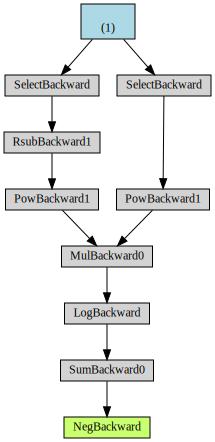

In [ ]:
X = [1, 0, 1, 0, 1, 0, 0, 1]
log_l = logLikelihood(X,theta)
make_dot(log_l)

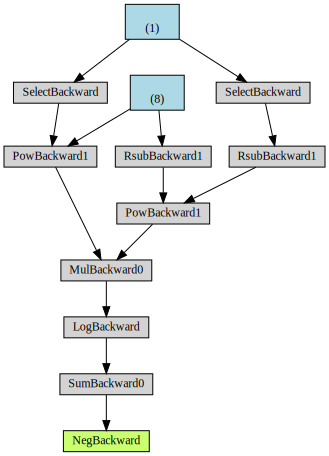

In [ ]:
#Quelqu'un peut dire pourquoi X est pas dans le graphe ? et qu'il est dans celui ci ? et lequel est plus correct
def logLikelihood2(X,theta):
  datas = torch.tensor(X,requires_grad=True)
  return -torch.sum(torch.log(Likelyhood(datas,theta)))

X = [1, 0, 1, 0, 1, 0, 0, 1]
log_l = logLikelihood2(np.array(X).astype(float),theta)
make_dot(log_l)

**Etape 03** On optimize ! C'est différentiable donc aucun souci de ce coté la.

In [ ]:
X = [1, 0, 1, 0, 1 , 1, 1, 1]


def logLikelihood(X,theta):
  datas = torch.tensor(X)
  return -torch.sum(torch.log(Likelyhood(datas,theta)))


theta = torch.rand((1,))
theta = Variable(theta, requires_grad=True)

optimizer = torch.optim.SGD( [theta], lr=1e-3)

for i in range(1000):
  log_l = logLikelihood(X,theta)

  log_l.backward()
  
  optimizer.step()
  optimizer.zero_grad()

print(theta)

tensor([0.7500], requires_grad=True)


In [ ]:
X = np.random.randint(0,2,250)


def logLikelihood(X,theta):
  datas = torch.tensor(X)
  return -torch.sum(torch.log(Likelyhood(datas,theta)))


theta = torch.rand((1,))
theta = Variable(theta, requires_grad=True)
optimizer = torch.optim.SGD([theta], lr=1e-3)
for i in range(1000):
  log_l = logLikelihood(X,theta)
  log_l.backward()
  optimizer.step()
  optimizer.zero_grad()

print(theta)
print("Mean of X : ",X.mean())

tensor([0.5000], requires_grad=True)
Mean of X :  0.5


Donc pour faire bref vous pouvez modéliser n'importe quel phénomène par n'importe quel distribution qui vous viens en tête, vous pourrez toujours apprendre les paramètres de cette distribution en maximisant la vraisemblance par une descente de gradient.

Ici le modèle est simple pour que vous puissiez facilement comprendre l'idée mais des modéles très sophistiqués existent dans la littérature voire [ici](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1) si ça vous intéresse

## Approche par minimisation du coût la plus simple de l'univers : une regréssion linéaire

Un modèle de regréssion linéaire tente de prédire une variable y a partir de plusieurs samples rangés dans une matrice X.

Le nombre de colonnes de X représente le nombre d'attributs.

Le nombre de lignes de X représente le nombre d'exemples.

On va aborder successivement trois exemples : 

1. Regression de données jouet un attribut (visualisable).
2. Regression de données jouet a plusieurs attributs.


### Regression de données jouet avec un attribut

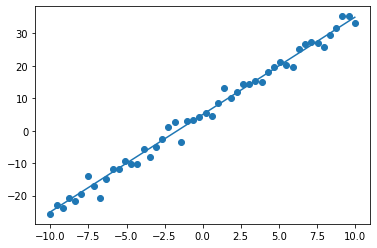

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
#On va commencer par une regression sur un seule attribut parce qu'on peut la visualiser facilement
X = np.linspace(-10,10,50)
torch.tensor(X)
y = 3*X + 5 + 2*np.random.normal(0,1,X.shape)
#La j'affiche le nuage de points
plt.scatter(X,y)
#La j'affiche la droite qui l'a généré et qu'on va essayer de reconstruire
plt.plot(X,3*X + 5)

In [ ]:

#Rappel une droite c'est y = a.x +b donc ici il s'agit d'apprendre a et b donc un vecteur de variables a deux composante theta = [a,b]
theta = torch.rand(2)
theta = Variable(theta, requires_grad= True)
theta

tensor([0.6650, 0.6465], requires_grad=True)

In [ ]:
#A présent il faut définir comment calculer les prédictions pour un vecteur de paramètres theta fixé et pour ce faire on va utiliser une astuce de calcul
# [x,1]@[a,b].T donne ax + b donc on va ajouter une colonne de 1 et on aura X@theta qui générera une matrice colonne de prédictions

#On génére autant de 1 qu'il n'y a de X
o = torch.ones(X.shape[0])
#On les STACK (on ne les concatène pas)
X_o = torch.stack([torch.tensor(X),o])
X_o.shape

torch.Size([2, 50])

In [ ]:
#On préférerais avoir 50 lignes et deux colonnes donc on transpose ça 
o = torch.ones(X.shape[0])
X_o = torch.stack([torch.tensor(X),o]).T #J'ai ajouté un .T
X_o.shape

torch.Size([50, 2])

In [ ]:
#Donc la on peut facilement calculer la prédiction
#Bon reflexe avant de faire une multiplication matricielle vérifier la forme de theta
theta.shape

torch.Size([2])

In [ ]:
#ça cloche parce que theta est un vecteur et X_o une matrice donc on va changer la shape avec view
theta.view((2,1))
#J'ai mis (2,1) comme shape comme ça X_o@theta va donner (50,2)@(2,1) -> (50,1) -> (50)

tensor([[0.6650],
        [0.6465]], grad_fn=<ViewBackward>)

In [ ]:
# testez ça torch.matmul(X_o,theta)
y_p = torch.matmul(X_o.float(),theta)
y_p 

tensor([-6.0032, -5.7317, -5.4603, -5.1889, -4.9175, -4.6461, -4.3747, -4.1033,
        -3.8318, -3.5604, -3.2890, -3.0176, -2.7462, -2.4748, -2.2033, -1.9319,
        -1.6605, -1.3891, -1.1177, -0.8463, -0.5749, -0.3034, -0.0320,  0.2394,
         0.5108,  0.7822,  1.0536,  1.3251,  1.5965,  1.8679,  2.1393,  2.4107,
         2.6821,  2.9535,  3.2250,  3.4964,  3.7678,  4.0392,  4.3106,  4.5820,
         4.8535,  5.1249,  5.3963,  5.6677,  5.9391,  6.2105,  6.4819,  6.7534,
         7.0248,  7.2962], grad_fn=<MvBackward>)

In [ ]:
import torch
from torch.autograd import Variable
#La loss qu'on va utiliser est la distance au sens des moindres carrés

#On récapitule
def loss(theta: torch.tensor,X : torch.tensor ,y_true: torch.tensor) -> torch.tensor:
  """
  Compute the mean square error loss between the prediction and the real target
  Params:
    - theta: vector [a,b] of params
    - X: Data
    - y_true: labels
  Returns: 
    -y_p: Predicted labels
    -loss: mean square loss
  """
  y_p = torch.matmul(X.float(),theta)
  loss = torch.mean(torch.pow(y_p-y_true,2))
  return y_p, loss

#ça c'est des prétraitement
theta = torch.rand(2)
theta = Variable(theta, requires_grad= True)
theta.view((2,1))
o = torch.ones(X.shape[0])
X_o = torch.stack([torch.tensor(X),o]).T 
#On test la fonction
y_true = torch.tensor(y)
loss(theta,X_o,y_true)

(tensor([-2.1163, -1.9949, -1.8735, -1.7522, -1.6308, -1.5094, -1.3880, -1.2666,
         -1.1452, -1.0238, -0.9024, -0.7810, -0.6596, -0.5383, -0.4169, -0.2955,
         -0.1741, -0.0527,  0.0687,  0.1901,  0.3115,  0.4329,  0.5543,  0.6756,
          0.7970,  0.9184,  1.0398,  1.1612,  1.2826,  1.4040,  1.5254,  1.6468,
          1.7682,  1.8895,  2.0109,  2.1323,  2.2537,  2.3751,  2.4965,  2.6179,
          2.7393,  2.8607,  2.9821,  3.1035,  3.2248,  3.3462,  3.4676,  3.5890,
          3.7104,  3.8318], grad_fn=<MvBackward>),
 tensor(278.3685, dtype=torch.float64, grad_fn=<MeanBackward0>))

In [ ]:
#Boucle d'optimisation
theta = torch.rand(2)
theta = Variable(theta, requires_grad= True)
theta.view((2,1))
o = torch.ones(X.shape[0])
X_o = torch.stack([torch.tensor(X),o]).T 
y_true = torch.tensor(y)

optimizer = torch.optim.SGD([theta], lr=1e-2)

for i in range(20000):
  _, mse_loss = loss(theta,X_o,y_true) #Osef des prédictions
  mse_loss.backward()
  optimizer.step()
  optimizer.zero_grad()

theta.detach().numpy()

array([3.0272121, 4.900076 ], dtype=float32)

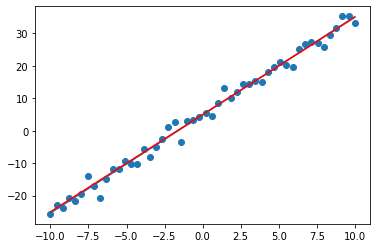

In [ ]:
#Voyons voire la droite qu'on obtient
t = theta.detach().numpy()
t = t.reshape((2,1))
X_o = X_o.reshape((50,2))
pred = X_o@t
plt.plot(X,pred)
plt.plot(X,3*X + 5, c="red")
plt.scatter(X,y)

### Regression de données jouet avec plusieurs attributs
On génère plusieurs colonnes de données cette fois, 

In [ ]:
#On génère des données jouet
N_LIGNES = 1000
N_COLONNES = 15
X = np.random.random((N_LIGNES,N_COLONNES))
X = torch.tensor(X)
X.shape

torch.Size([1000, 15])

In [ ]:
#On défini un theta_v qui va nous servir a générer un y
theta_v = np.random.randint(0,40,N_COLONNES).reshape((N_COLONNES,1))
theta_v = torch.tensor(theta_v).float()
print(theta_v.shape)
print(theta_v.T)

torch.Size([15, 1])
tensor([[34., 13., 15.,  4., 24.,  0., 12., 21., 23., 23., 14., 11., 22., 35.,
         30.]])


In [ ]:
#On génère les y
y_t = torch.matmul(X.float(),theta_v)
y = y_t + 2*np.random.normal(0,1,y_t.shape)
y.shape

torch.Size([1000, 1])

In [ ]:
X= torch.tensor(X).float()
y_true = torch.tensor(y).float()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
#On récapitule
def loss(theta: torch.tensor,X : torch.tensor ,y_true: torch.tensor) -> torch.tensor:
  """
  Compute the mean square error loss between the prediction and the real target
  Params:
    - theta: vector of params
    - X: Data
    - y_true: labels
  Returns: 
    -y_p: Predicted labels
    -loss: mean square loss
  """
  y_p = torch.matmul(X.float(),theta)
  loss = torch.mean(torch.pow(y_p-y_true,2))
  return y_p, loss

In [ ]:
from IPython.display import clear_output, display

theta = torch.rand(N_COLONNES).view((N_COLONNES,1))
theta = Variable(theta.float(), requires_grad= True)
theta.view((N_COLONNES,1))
optimizer = torch.optim.Adam([theta], lr=1e-1)
for i in range(10000):
  _, mse_loss = loss(theta,X,y_true) #Osef des prédictions
  mse_loss.backward()
  optimizer.step()
  optimizer.zero_grad()


display(mse_loss)
theta.detach().numpy()


tensor(3.9186, grad_fn=<MeanBackward0>)

array([[34.00324   ],
       [13.022289  ],
       [14.842494  ],
       [ 4.1467943 ],
       [23.757229  ],
       [-0.08636472],
       [11.810159  ],
       [21.20627   ],
       [23.129208  ],
       [23.038445  ],
       [13.771152  ],
       [10.948319  ],
       [21.657581  ],
       [35.264957  ],
       [30.623056  ]], dtype=float32)

In [ ]:
theta_v.T

tensor([[34., 13., 15.,  4., 24.,  0., 12., 21., 23., 23., 14., 11., 22., 35.,
         30.]])

In [ ]:
  _, mse_loss = loss(theta_v,X,y_true)
mse_loss

tensor(3.9938)

## Utiliser des modules pour encapsuler un modèle prédictif

In [ ]:
import torch.nn as nn

class Regression(nn.Module):
    def __init__(self, nb_colonnes):
        super().__init__()
        self.theta = nn.Parameter(torch.randn(nb_colonnes, requires_grad=True, dtype=torch.float).view((nb_colonnes,1))) #A l'intérieur d'un module on utilie nn.Parametre pour définir un paramètre.
        self.biais = nn.Parameter(torch.randn(1))
               
    def forward(self, x):
      #Cette méthode sert a préciser comment a partir d'un x de taille (? , NB_COLONNES) on peut générer un vecteur colonne (? , 1) de prédictions
      #Pour l'utiliser on appelle le module qu'on a construit comme si c'était une fonction
      return torch.matmul(x,self.theta) + self.biais

In [ ]:
#On check que ça marche comme prévu
R = Regression(x_train_tensor.shape[1])
for x,y in train_loader:
  print(R(x).shape)
  break

In [ ]:
#On peut même print le modèle 
!pip install torchviz
from torchviz import make_dot
p = R(x)
make_dot(p)

In [ ]:
R = Regression(x_train_tensor.shape[1])

losses = []
optimizer = torch.optim.SGD(R.parameters(), lr=1e-4)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(1000):
    R.train() #ça c'est pour mettre le modèle en mode apprentissage
    for batch_x,batch_y in train_loader:
          p = R(batch_x)
          loss = mse_loss(batch_y, p)
          loss.backward()
          losses.append(loss.item())
          optimizer.step()
          optimizer.zero_grad()

In [ ]:
R = Regression(x_train_tensor.shape[1])

losses = []
val_losses = []
optimizer = torch.optim.SGD(R.parameters(), lr=1e-5)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(100):
    R.train() #ça c'est pour mettre le modèle en mode apprentissage
    for batch_x,batch_y in train_loader:
          p = R(batch_x)
          loss = mse_loss(batch_y.view((-1,)), p.view((-1,)))
          loss.backward()
          losses.append(loss.item())
          optimizer.step()
          optimizer.zero_grad()
    pred_val = R(x_test_tensor)
    val_loss = mse_loss(y_test_tensor.view((-1,)), pred_val.view((-1,)))
    val_losses.append(val_loss)
  
print("Validation loss : ",val_loss)
print("Training loss : ",loss.item())

In [ ]:
plt.plot(np.arange(len(losses)), losses)

In [ ]:
plt.plot(np.arange(len(val_losses)), val_losses)

# Et les réseaux de neurones dans tout ça ?

Aprés toutes ces interludes, vous devez probablement vous demander le rapport entre tout ce qu'on a fait et les réseaux de neurones.

Pour faire bref, ce qu'on a fait en dernier était en réalité un réseau de neurones, un réseau de neurones a un seul noeud.

In [ ]:
import torch.nn as nn


def train_step_constructor(model,loss_f,optimizer):
  
  def train_step(batch_x, batch_y):
    p = model(batch_x)
    loss = loss_f(batch_y.view((-1,)), p.view((-1,)))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()
  return train_step


class Regression_NN(nn.Module):
    def __init__(self, nb_colonnes):
        super().__init__()
        self.l1 = nn.Linear(nb_colonnes, 1, bias = True) #(prend un vecteur (?,nb_colonnes) et en renvoie un (?,1) correspondant a la prédiction)
               
    def forward(self, x):
      return self.l1(x)

In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
from tqdm.notebook import tqdm

class Toy_Dataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)


train_data = Toy_Dataset(X.float(), y_true.float())
y_true.shape

torch.Size([1000, 1])

In [ ]:
def train_NN(alpha = 1e-5, epochs = 100, device = "cpu", batch_size = 100) -> (nn.Module, list, list):
  """
  Perform the training on the x_tensor, y_tensor splitted.
  Params:
    - alpha : Learning rate
  Returns: 
    - R: Trained Model
    - losses: Training Losses
    - val_losses: Validation Losses
  """
  losses = []
  val_losses = []

  R = Regression_NN(X.shape[1]).to(device)

  optimizer = torch.optim.Adam(R.parameters(), lr=alpha)

  mse_loss = nn.MSELoss(reduction='mean')

  train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
  train_step = train_step_constructor(R, mse_loss, optimizer)
  outer = tqdm(total=epochs, desc='Epochs', position=0)
  for epoch in range(epochs):
    inner = tqdm(total=len(train_loader), desc=f'Batch {epoch+1}', position=1)
    for batch_x,batch_y in train_loader:
      inner.update(1)
      batch_x = batch_x.to(device)
      batch_y = batch_y.to(device)
      R.train()
      l = train_step(batch_x, batch_y)
      losses.append(l)
      inner.set_postfix({'loss': l})
    outer.update(1)
  print("Model params: ",list(R.parameters()))
  return R, losses, val_losses

In [ ]:
R, losses, val_losses = train_NN(1e-1, 50, batch_size = 5)

Model params:  [Parameter containing:
tensor([[34.0956, 12.8908, 14.9748,  4.3526, 23.7721, -0.0573, 11.8246, 21.3567,
         23.1848, 23.3024, 13.6029, 10.8678, 21.7592, 35.1900, 30.5779]],
       requires_grad=True), Parameter containing:
tensor([0.7294], requires_grad=True)]


In [ ]:
theta_v.T

tensor([[34., 13., 15.,  4., 24.,  0., 12., 21., 23., 23., 14., 11., 22., 35.,
         30.]])

In [ ]:
class Regression_DNN(nn.Module):
    def __init__(self, nb_colonnes):
        super().__init__()
        self.l1 = nn.Linear(nb_colonnes, 24, bias = True)
        self.l2 = nn.Linear(24, 24, bias = True)
        self.l3 = nn.Linear(24, 1, bias=True )
               
    def forward(self, x):
      x = self.l1(x)
      x = self.l2(x)
      return self.l3(x)

In [ ]:
from tqdm.notebook import tqdm
def train_DNN(alpha = 1e-5, epochs = 100, device = "cpu", batch_size = 100) -> (nn.Module, list, list):
  """
  Perform the training on the x_tensor, y_tensor splitted.
  Params:
    - alpha : Learning rate
  Returns: 
    - R: Trained Model
    - losses: Training Losses
    - val_losses: Validation Losses
  """
  losses = []
  val_losses = []

  R = Regression_DNN(x_train_tensor.shape[1]).to(device)
  optimizer = torch.optim.Adam(R.parameters(), lr=alpha)
  mse_loss = nn.MSELoss(reduction='mean')

  train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

  train_step = train_step_constructor(R,mse_loss, optimizer)
  #ça c'est la barre du nombre d'epochs
  outer = tqdm(total=epochs, desc='Epochs', position=0)
  for epoch in range(epochs):
    #On crée une barre par epoch 
    inner = tqdm(total=len(train_loader), desc=f'Batch {epoch+1}', position=1)
    for batch_x,batch_y in train_loader:
      #On ajoute une étape d'entrainement
      inner.update(1)
      batch_x = batch_x.to(device)
      batch_y = batch_y.to(device)
      R.train()
      l = train_step(batch_x, batch_y)
      losses.append(l)
      R.eval()
      pred_val = R(x_test_tensor.to(device))
      val_loss = mse_loss(y_test_tensor.view((-1,)).to(device), pred_val.view((-1,)).to(device))
      val_losses.append(val_loss.item())

      #MAJ de l'affichage de l'epoch courant
      inner.set_postfix({'val_loss': val_loss.item(),'loss': l})
      ######
    #On ajoute le nombre d'epochs
    outer.update(1)

  return R, losses, val_losses

In [ ]:
R, losses, val_losses = train_DNN(1e-2, 50, batch_size = 64, device ="cuda")

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 78, in run
    instances = self.get_instances()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 58, in get_instances
    return [i for i in self.tqdm_cls._instances.copy()
  File "/usr/lib/python3.6/_weakrefset.py", line 92, in copy
    return self.__class__(self)
  File "/usr/lib/python3.6/_weakrefset.py", line 50, in __init__
    self.update(data)
  File "/usr/lib/python3.6/_weakrefset.py", line 119, in update
    for element in other:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [ ]:
mse_loss = nn.MSELoss(reduction='mean')
pred_val = R(x_test_tensor.to("cuda")).to("cpu")
val_loss = mse_loss(y_test_tensor.view((-1,)), pred_val.view((-1,)))
val_loss

tensor(0.5909, grad_fn=<MseLossBackward>)

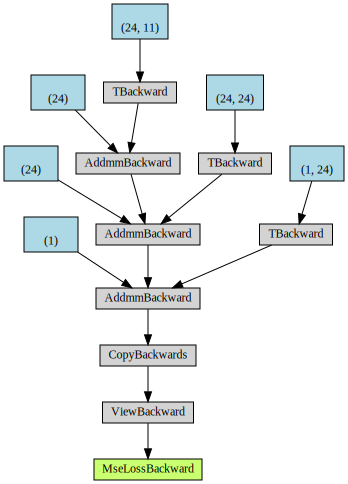

In [ ]:
make_dot(val_loss)

Dernier petit point sur l'enregistrement d'un modèle.

In [ ]:
torch.save(R.state_dict(), "out.net")

In [ ]:
!ls

out.net      winequality-white.csv    winequality-white.csv.2
sample_data  winequality-white.csv.1  winequality-white.csv.3


In [ ]:
model = Regression_DNN(x_train_tensor.shape[1])
model.load_state_dict(torch.load("out.net"))
model.eval() #Mode inférence

pred_val = model(x_test_tensor)
val_loss = mse_loss(y_test_tensor.view((-1,)), pred_val.view((-1,)))
val_loss

tensor(0.5909, grad_fn=<MseLossBackward>)